# Predict Diabetes using with Machine Learnin

In [97]:
# Import Packages
import pandas as pd # Used to work with datasets
import numpy as np # Used to work with arrays


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns



import sklearn 
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote
from sklearn.tree import DecisionTreeClassifier## is a class capable of performing multiclass classification on a dataset.
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier#Iteratively trains because at each time step the partial derivatives of the loss function with respect to the model parameters are computed. 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import BayesianGaussianMixture
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as ltb


from sklearn.preprocessing import StandardScaler## Removes the average and scales each feature/variable for unit variance. This process is carried out in an independent manner
from sklearn.model_selection import train_test_split , cross_val_score,KFold,GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report
#from sklearn.metrics import plot_confusion_matrix



import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<h3>Data </h3>

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

In [98]:
#read data
diabetes = pd.read_csv('diabetes.csv')


In [99]:
#name columns 
print(diabetes.columns) 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [100]:
diabetes.head() # Show part of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
#shape data
print("dimension of data: {}".format(diabetes.shape))

dimension of data: (768, 9)


The diabetes dataset consists of 768 data points, with 9 features each:

In [102]:
## print about information  
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
#check is null data
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
## print describtion  
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


"outcome" Is the feature that I will expect, 0 means no diabetes, 1 means presence

In [105]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


500 is rated as 0 and 268 as 1:

In [106]:
# create datarame in Outcome =0 and Outcome=1
diabetes_0=diabetes[diabetes['Outcome']==0]
diabetes_1=diabetes[diabetes['Outcome']==1]

<Axes: xlabel='Outcome', ylabel='count'>

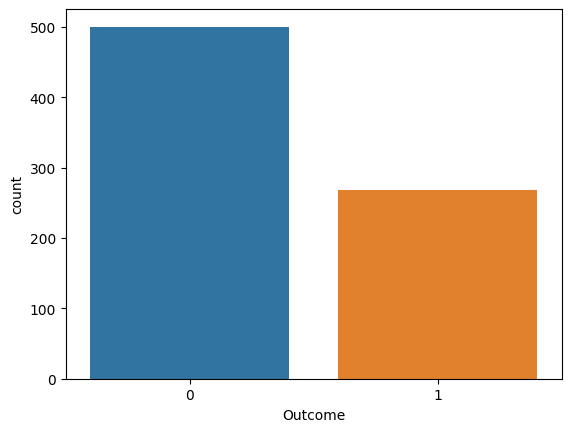

In [107]:
## The number of views in each categorical basket using bars.
sns.countplot(data= diabetes , x='Outcome',label="Count")


#### Age

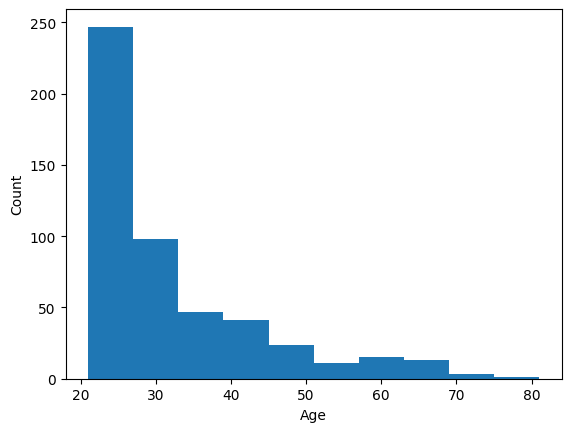

In [108]:
# histogram of the "Age" variable in the "Outcome=0" dataset 
plt.hist(diabetes_0["Age"] )
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

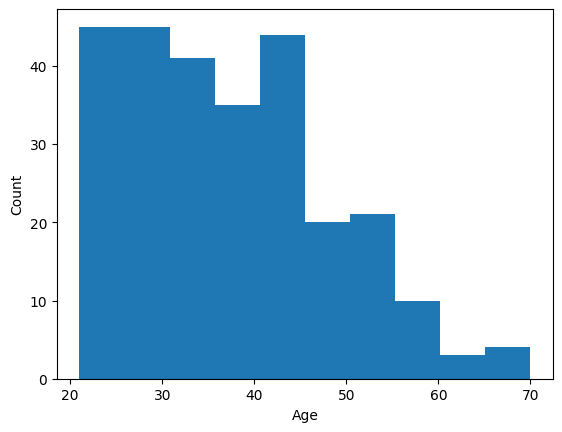

In [109]:
# histogram of the "Age" variable in the "Outcome=1" dataset 
plt.hist(diabetes_1["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

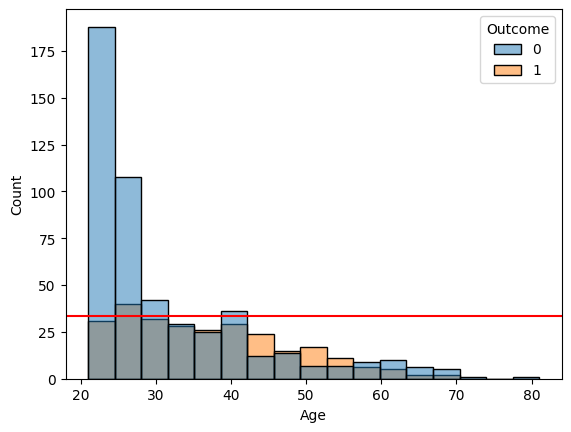

In [110]:
# histogram of the "Age"  
sns.histplot(data=diabetes, x='Age'  , hue='Outcome')
plt.xlabel("Age")
plt.ylabel("Count")
plt.axhline(np.mean(diabetes['Age']), color='red', linestyle='solid')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a7c8f6ac10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a7c8f6ad30>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a7c8f6a2e0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a7c23cb8b0>}

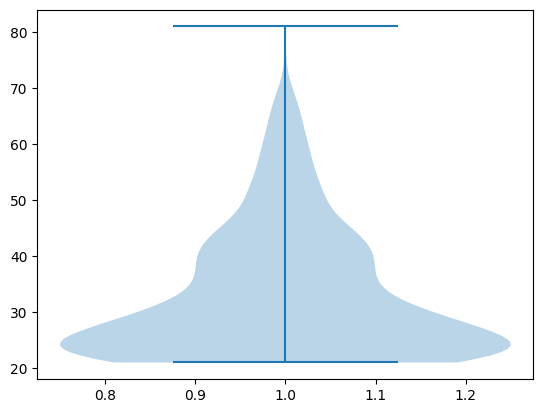

In [111]:
#plot Age
plt.violinplot(diabetes['Age'])

<Axes: >

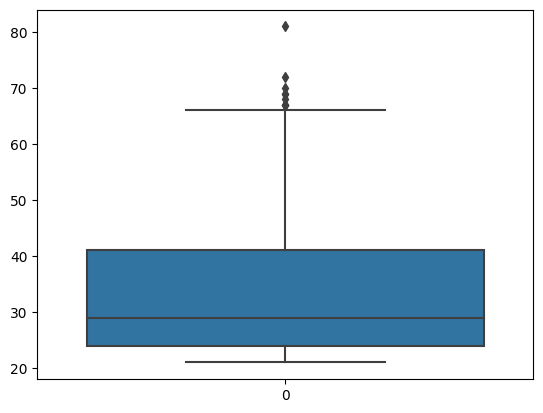

In [112]:
#boxplot Age
sns.boxplot(diabetes['Age'])

In [113]:
diabetes_0['Age'].mean()

31.19

In [114]:
diabetes_1['Age'].mean()

37.06716417910448

###### The incidence of diabetes increases from the age of 38

#### SkinThickness

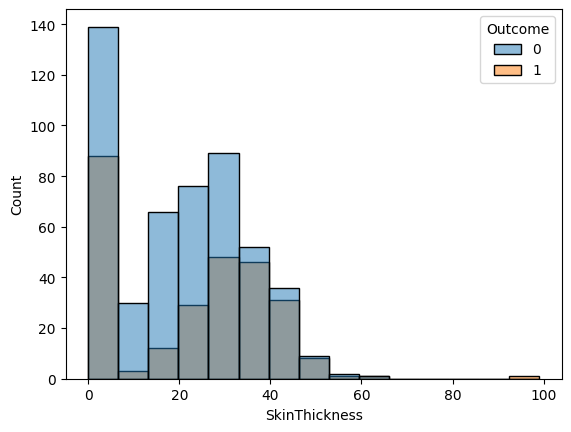

In [115]:
# histogram of the "SkinThickness"  

sns.histplot(data=diabetes, x='SkinThickness'  , hue='Outcome')
plt.xlabel("SkinThickness")
plt.ylabel("Count")
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a7c1e0b580>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a7c1e0b2e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a7c1e0b520>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a7c1e16fa0>}

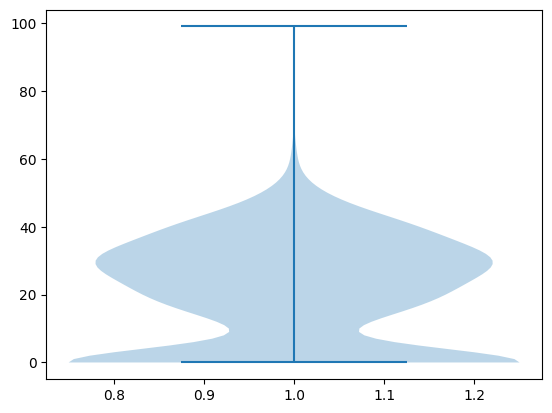

In [116]:
#violinplot SkinThickness
plt.violinplot(diabetes['SkinThickness'])

In [117]:
# average healthy people  SkinThickness 
diabetes_0['SkinThickness'].mean()


19.664

In [118]:
# max healthy people  SkinThickness 
diabetes_0['SkinThickness'].max()


60

In [119]:
# average diabetics  SkinThickness 

diabetes_1['SkinThickness'].mean()


22.16417910447761

In [120]:
# max diabetics  SkinThickness 
diabetes_1['SkinThickness'].max()


99

###### The thickness of the skin of diabetics is higher than that of healthy people

#### BMI

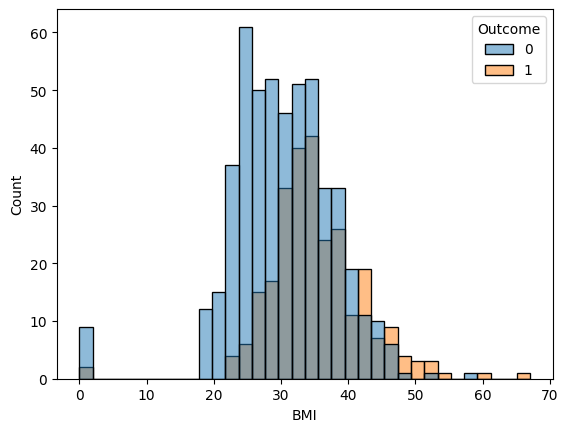

In [121]:
## histogram of the "BMi"  

sns.histplot(data=diabetes, x='BMI'  , hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [122]:
# average healthy people  BMI 

diabetes_0['BMI'].mean()


30.3042

In [123]:
# max healthy people  BMI 

diabetes_0['BMI'].max()


57.3

In [124]:
# average healthy people  BMI 

diabetes_1['BMI'].mean()


35.14253731343284

In [125]:
# max healthy people  BMI 

diabetes_1['BMI'].max()


67.1

###### BMI is more common in affected patients than in healthy people.

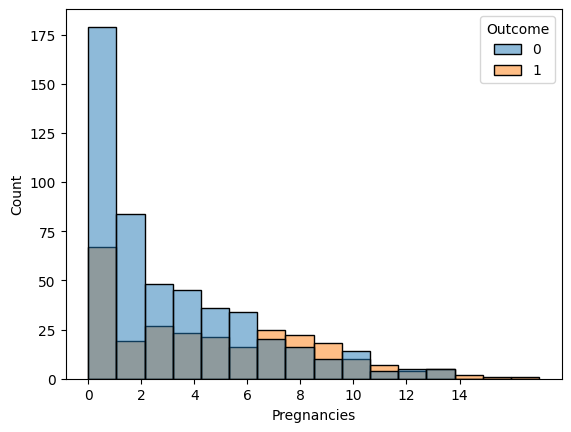

In [126]:
## histogram of the "Pregnancies"  

sns.histplot(data=diabetes, x='Pregnancies', hue='Outcome')
plt.xlabel("Pregnancies")
plt.ylabel("Count")
plt.xticks(range(0,15,2))
plt.show()

<Axes: xlabel='Pregnancies', ylabel='count'>

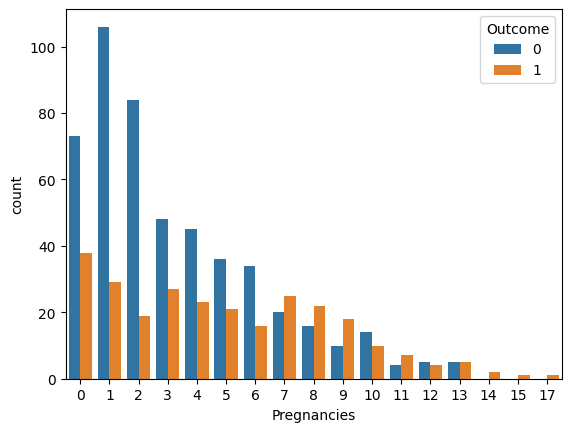

In [127]:
sns.countplot(data= diabetes , x='Pregnancies',hue="Outcome")

In [128]:
# average healthy people  Pregnancies 

diabetes_0['Pregnancies'].mean()


3.298

In [129]:
# max healthy people  Pregnancies 

diabetes_0['Pregnancies'].max()


13

In [130]:
# average healthy people  Pregnancies 

diabetes_1['Pregnancies'].mean()


4.865671641791045

In [131]:
# max healthy people  Pregnancies 

diabetes_1['Pregnancies'].max()


17

###### The higher the number of pregnancies, the higher the incidence of diabetes

#### BMI

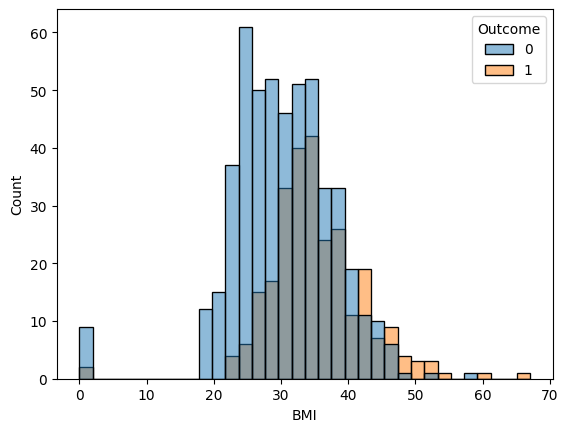

In [132]:
## histogram of the "BMI"  

sns.histplot(data=diabetes, x='BMI', hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

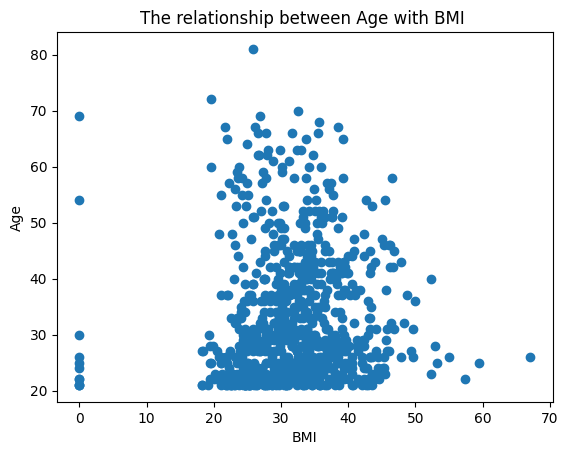

In [133]:
#scateer plot relationship between Age with BMI
plt.scatter (diabetes["BMI"] , diabetes["Age"] )
plt.title ("The relationship between Age with BMI ")
plt.xlabel ('BMI' )
plt.ylabel ('Age')
plt.show ()

In [134]:
# average healthy people  BMI 

diabetes_0['BMI'].mean()


30.3042

In [135]:
# max healthy people  BMI 

diabetes_0['BMI'].max()


57.3

In [136]:
# average healthy people  BMI 

diabetes_1['BMI'].mean()


35.14253731343284

In [137]:
# max healthy people  BMI 

diabetes_1['BMI'].max()


67.1

In [138]:
#to compare  correlation between a target  and other features in absolute 
correlations = diabetes.corr()['Outcome'].drop('Outcome')
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

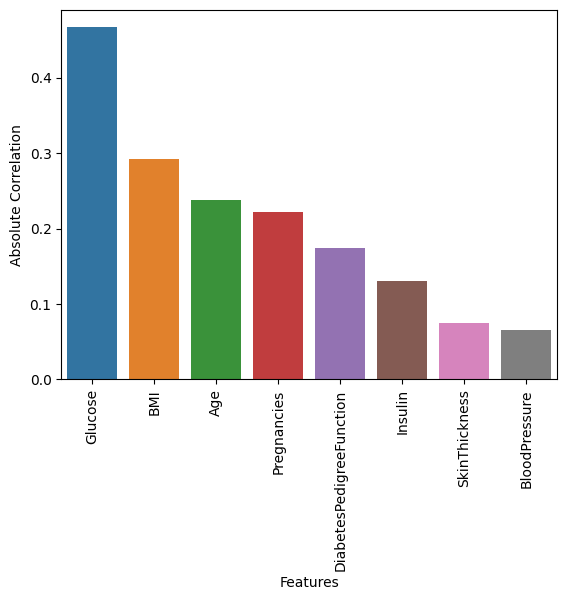

In [139]:
# show bar to compare correlation between a target and other features in absolute 
# to be organized and easy to compare

sns.barplot(x=sorted_correlations.index, y=sorted_correlations)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation')
plt.show()

###### We will train the model on the most important Features

In [140]:
diabetes_corr = sorted_correlations[:6]
diabetes_corr

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
Name: Outcome, dtype: float64

In [141]:
diabetes_corr=diabetes[['Glucose',"BMI","Age",'Pregnancies','DiabetesPedigreeFunction',"Outcome"]]
diabetes_corr

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Outcome
0,148,33.6,50,6,0.627,1
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,1
3,89,28.1,21,1,0.167,0
4,137,43.1,33,0,2.288,1
...,...,...,...,...,...,...
763,101,32.9,63,10,0.171,0
764,122,36.8,27,2,0.340,0
765,121,26.2,30,5,0.245,0
766,126,30.1,47,1,0.349,1


###### drop Outlier noise data

In [142]:

# Calculate the interquartile range (IQR) for each column
Q1 = diabetes_corr.quantile(0.25)
Q3 = diabetes_corr.quantile(0.75)
IQR = Q3 - Q1


# Identify  dataoutliers
outliers = diabetes_corr[((diabetes_corr < (Q1 - 1.5 * IQR)) | (diabetes_corr > (Q3 + 1.5 * IQR))).any(axis=1)]

# drop  the outliers from the data
train_clean = diabetes_corr.drop(outliers.index )

In [143]:
train_clean

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Outcome
0,148,33.6,50,6,0.627,1
1,85,26.6,31,1,0.351,0
2,183,23.3,32,8,0.672,1
3,89,28.1,21,1,0.167,0
5,116,25.6,30,5,0.201,0
...,...,...,...,...,...,...
763,101,32.9,63,10,0.171,0
764,122,36.8,27,2,0.340,0
765,121,26.2,30,5,0.245,0
766,126,30.1,47,1,0.349,1


Text(0.5, 1.0, 'Correlation data ')

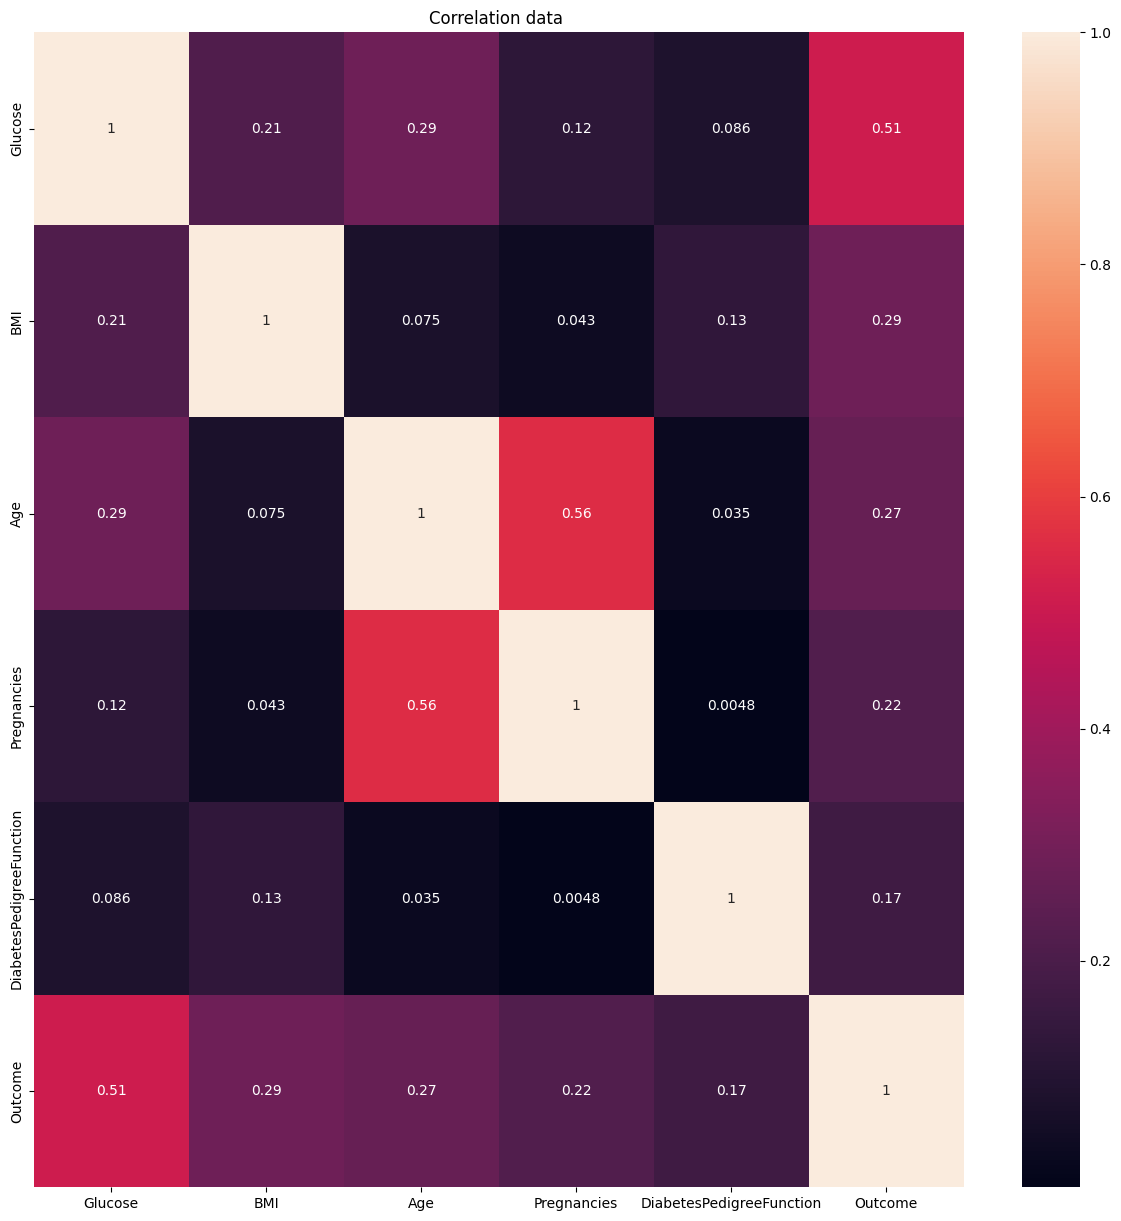

In [144]:
#visualizing the correlation between the variables in the diabetes 
plt.figure(figsize=(15,15))
sns.heatmap (np.abs(train_clean.corr()), annot = True  )
plt.title ("Correlation data " , fontsize = 12 )


In [145]:
#split data
X= train_clean.drop(columns=['Outcome']) # data
y= train_clean['Outcome']  #target

In [146]:
#StandardScaler in dataframe
Stand = StandardScaler()
x = pd.DataFrame(Stand.fit_transform(X) , columns=X.columns)

In [147]:
x

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction
0,0.894987,0.221773,1.536724,0.670837,0.784690
1,-1.202793,-0.857459,-0.167284,-0.856747,-0.316195
2,2.060420,-1.366240,-0.077599,1.281871,0.964182
3,-1.069601,-0.626195,-1.064131,-0.856747,-1.050117
4,-0.170552,-1.011635,-0.256969,0.365320,-0.914501
...,...,...,...,...,...
700,-0.670024,0.113850,2.702625,1.892904,-1.034163
701,0.029236,0.715136,-0.526023,-0.551230,-0.360070
702,-0.004062,-0.919130,-0.256969,0.365320,-0.738998
703,0.162429,-0.317843,1.267670,-0.856747,-0.324172


In [148]:
#create List models 
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LogisticRegression', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('GaussianNB', GaussianNB()))
models.append(('MLPClassifier', MLPClassifier()))
models.append(('BayesianGaussianMixture', BayesianGaussianMixture()))
models.append(('SGDClassifier', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

In [149]:

# calculate accuracy
scoring_=[]

name_m=[]



for i in range(len(models)):
    kfold = KFold(n_splits=10, shuffle=True, random_state=43)
    scor = cross_val_score(models[i][1], X, y, cv=kfold, scoring='accuracy')  
    scoring_.append(scor)
    name_m.append(models[i][0])
    print("{} : score {:.3f} ".format(models[i][0]  , np.mean(scoring_)  ))

KNN : score 0.745 
SVM : score 0.757 
DecisionTreeClassifier : score 0.738 
LogisticRegression : score 0.749 
LinearDiscriminantAnalysis : score 0.755 
GaussianNB : score 0.757 
MLPClassifier : score 0.749 
BayesianGaussianMixture : score 0.739 
SGDClassifier : score 0.722 
RandomForestClassifier : score 0.726 


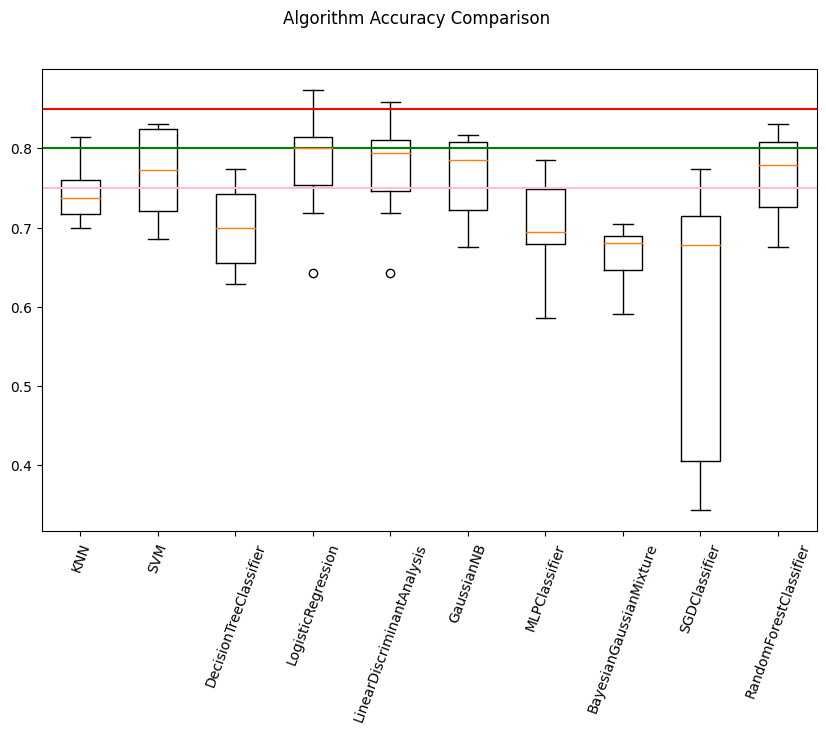

In [150]:
# visualization boxplot Algorithm Accuracy Comparison
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)

plt.boxplot(scoring_)
plt.axhline(0.75, color='pink', linestyle='solid')
plt.axhline(0.80, color='green', linestyle='solid')
plt.axhline(0.85, color='red', linestyle='solid')
ax.set_xticklabels(name_m,rotation=70)
plt.show()

In [151]:
def confusion_matrix_sh(confusion_matrix, class_labels):
    """
    Display the confusion matrix using matplotlib.
    """

    # Normalize the confusion matrix
    confusion_matrix_normalized = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

    # Set up the figure
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)

    # Add labels to each cell
    thresh = confusion_matrix_normalized.max() / 2.0
    for i, j in np.ndindex(confusion_matrix.shape):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_normalized[i, j] > thresh else "black")

    # Set axis labels
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [152]:
# function evaluation 
def evaluate(model,X,target):
    """
    Evaluate the performance of the model
    
    Inputs:
     Model , 
     Data , 
     Target .     
     
     
    Outputs:
    Accuracy,
    Precision 
    Recall
    F1 Score
    AUC-ROC
    confusion matrix
    """
    
    #split the data into training and testing 
    X_train,X_test ,y_train , y_test=train_test_split(X , target ,test_size=0.25 , random_state=543 )
    
    model.fit(X_train , y_train)  # fit model     
    
    y_pred=model.predict(X_test)
    
    
    print("model: ",model)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)

    # Recall
    recall = recall_score(y_test, y_pred)
    print("Recall:", recall)

    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score:", f1)

    # AUC-ROC
    auc_roc = roc_auc_score(y_test, y_pred)
    print("AUC-ROC:", auc_roc)

    
  
    # Confusion Matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)

    """
      
    #confusion matrix
    con_matrix = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.bone_r ,colorbar=True,labels=[0,1])
    con_matrix.ax_.set_title("Confusion Matrix")
    
    
    """
    
    report = classification_report(y_test, y_pred)
    print(report)
    

## K Nearest Neighbour predicted

It can be said that the Neighbors Nearest-k ,It is the simplest machine learning algorithm composed Build the model only from storing the training data set. To make a forecast for a new point in a group data, the algorithm finds the closest data points in the training data set

First, let's see if we can confirm the relationship between model complexity and accuracy:

In [153]:
#split data into train ,split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=543)

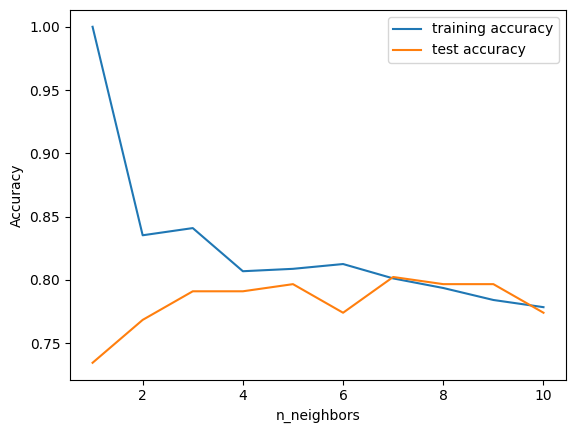

In [154]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # bulding nodel
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [155]:
## check   accuracy of the k-nearest neighbors
evaluate(KNeighborsClassifier(n_neighbors=2), X,y)

model:  KNeighborsClassifier(n_neighbors=2)
Accuracy: 0.768361581920904
Precision: 0.8571428571428571
Recall: 0.39344262295081966
F1 Score: 0.5393258426966292
AUC-ROC: 0.6794799321650651
Confusion Matrix:
 [[112   4]
 [ 37  24]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       116
           1       0.86      0.39      0.54        61

    accuracy                           0.77       177
   macro avg       0.80      0.68      0.69       177
weighted avg       0.79      0.77      0.74       177



## support vector machine

In [156]:
model=SVC()
model.fit(X_train , y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7966101694915254


In [157]:
param_grid = {'C': [0.1, 1, 10,100,1000,10000], 'gamma': [0.0001,0.001,0.01, 0.1, 1,10,100,1000]}

# Create an instance of the model
model = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

# Fit the GridSearchCV 
grid_search.fit(X_train, y_train)

# Get the best parameter 
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Evaluate the model with the best parameters 
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Best Parameters: ", best_params)
print("Best Accuracy: ", best_accuracy)
print("Test Accuracy: ", test_accuracy)

Best Parameters:  {'C': 10, 'gamma': 0.0001}
Best Accuracy:  0.7537878787878788
Test Accuracy:  0.7909604519774012


In [158]:
## check   accuracy of the  SVC

evaluate(grid_search,X,y)

model:  GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})
Accuracy: 0.7909604519774012
Precision: 0.8
Recall: 0.5245901639344263
F1 Score: 0.6336633663366338
AUC-ROC: 0.7278123233465236
Confusion Matrix:
 [[108   8]
 [ 29  32]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       116
           1       0.80      0.52      0.63        61

    accuracy                           0.79       177
   macro avg       0.79      0.73      0.74       177
weighted avg       0.79      0.79      0.78       177



## Decision tree classifier

In [159]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train))) # To calculate the accuracy of the training data
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))   # To calculate the accuracy of the test data

Accuracy on training set: 1.000
Accuracy on test set: 0.723


The accuracy on the training set using the decision tree classifier is 100

While the accuracy of the test set is much worse. This is an indication that the tree is suffering from over-adjustment


overfitting , It does not generalize well to new data. Therefore, we need to apply pre-pruning
  on the tree

Now I will do it again by setting
3 = depth_m
Which reduces the depth of the tree.
This leads to a lower accuracy in the training set, but improves the test set. 

In [160]:
## We check   accuracy of the  Decision tree classifier algorithm for predicting diabetes
model_tree= DecisionTreeClassifier(criterion="entropy", max_depth = 3,ccp_alpha=2,min_samples_split=5)
evaluate(model_tree, X,y)

model:  DecisionTreeClassifier(ccp_alpha=2, criterion='entropy', max_depth=3,
                       min_samples_split=5)
Accuracy: 0.655367231638418
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5
Confusion Matrix:
 [[116   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       116
           1       0.00      0.00      0.00        61

    accuracy                           0.66       177
   macro avg       0.33      0.50      0.40       177
weighted avg       0.43      0.66      0.52       177



## LogisticRegression for predicting diabetes

In [161]:
## We check   accuracy of the Logistic Regression
evaluate(LogisticRegression(), X,y)

model:  LogisticRegression()
Accuracy: 0.8022598870056498
Precision: 0.8095238095238095
Recall: 0.5573770491803278
F1 Score: 0.6601941747572815
AUC-ROC: 0.7442057659694742
Confusion Matrix:
 [[108   8]
 [ 27  34]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       116
           1       0.81      0.56      0.66        61

    accuracy                           0.80       177
   macro avg       0.80      0.74      0.76       177
weighted avg       0.80      0.80      0.79       177



### LinearDiscriminantAnalysis

In [162]:
evaluate(LinearDiscriminantAnalysis(),X, y)

model:  LinearDiscriminantAnalysis()
Accuracy: 0.807909604519774
Precision: 0.813953488372093
Recall: 0.5737704918032787
F1 Score: 0.673076923076923
AUC-ROC: 0.7524024872809496
Confusion Matrix:
 [[108   8]
 [ 26  35]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       116
           1       0.81      0.57      0.67        61

    accuracy                           0.81       177
   macro avg       0.81      0.75      0.77       177
weighted avg       0.81      0.81      0.80       177



### GaussianNB

In [163]:
evaluate(GaussianNB(),X,y)

model:  GaussianNB()
Accuracy: 0.8135593220338984
Precision: 0.8181818181818182
Recall: 0.5901639344262295
F1 Score: 0.6857142857142857
AUC-ROC: 0.760599208592425
Confusion Matrix:
 [[108   8]
 [ 25  36]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       116
           1       0.82      0.59      0.69        61

    accuracy                           0.81       177
   macro avg       0.82      0.76      0.78       177
weighted avg       0.81      0.81      0.80       177



## MLPClassifier for predicting diabetes

In [164]:
mlp = MLPClassifier(max_iter=100, alpha=0.001,   random_state=0)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format( mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test,y_test)))


Accuracy on training set: 0.727
Accuracy on test set: 0.734


In [165]:
## We check   accuracy of the  MLP Classi fier algorithm for predicting diabetes
evaluate(MLPClassifier(max_iter=100, alpha=1), X,y)

model:  MLPClassifier(alpha=1, max_iter=100)
Accuracy: 0.7062146892655368
Precision: 0.6666666666666666
Recall: 0.29508196721311475
F1 Score: 0.4090909090909091
AUC-ROC: 0.6087478801582815
Confusion Matrix:
 [[107   9]
 [ 43  18]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       116
           1       0.67      0.30      0.41        61

    accuracy                           0.71       177
   macro avg       0.69      0.61      0.61       177
weighted avg       0.70      0.71      0.67       177



### SGDClassifier

In [166]:
evaluate(SGDClassifier(),X,y)

model:  SGDClassifier()
Accuracy: 0.655367231638418
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.5
Confusion Matrix:
 [[116   0]
 [ 61   0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       116
           1       0.00      0.00      0.00        61

    accuracy                           0.66       177
   macro avg       0.33      0.50      0.40       177
weighted avg       0.43      0.66      0.52       177



### RandomForestClassifier

In [167]:
evaluate(RandomForestClassifier(),X,y)

model:  RandomForestClassifier()
Accuracy: 0.768361581920904
Precision: 0.7272727272727273
Recall: 0.5245901639344263
F1 Score: 0.6095238095238097
AUC-ROC: 0.7105709440361787
Confusion Matrix:
 [[104  12]
 [ 29  32]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       116
           1       0.73      0.52      0.61        61

    accuracy                           0.77       177
   macro avg       0.75      0.71      0.72       177
weighted avg       0.76      0.77      0.76       177



Hybrid model accuracy: 0.8192090395480226
Hybrid model precision: 0.8536585365853658
Hybrid model recall: 0.5737704918032787
Hybrid model F1 score: 0.6862745098039217
Hybrid model AUC-ROC score: 0.7610231769361221
Hybrid model confusion matrix:
[[110   6]
 [ 26  35]]


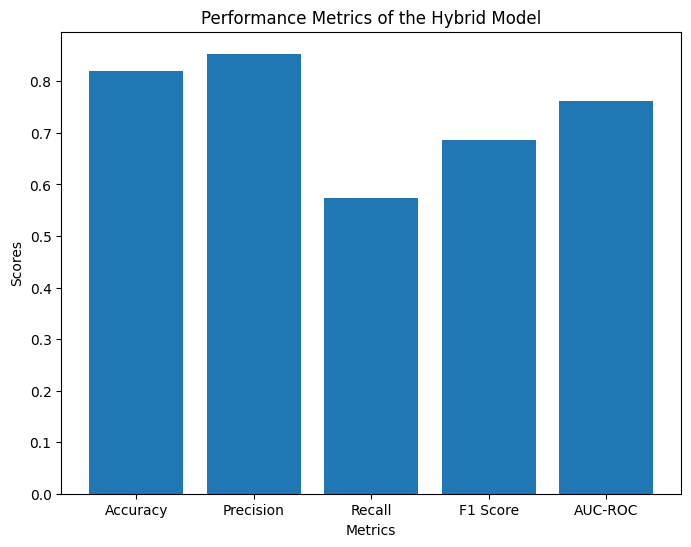

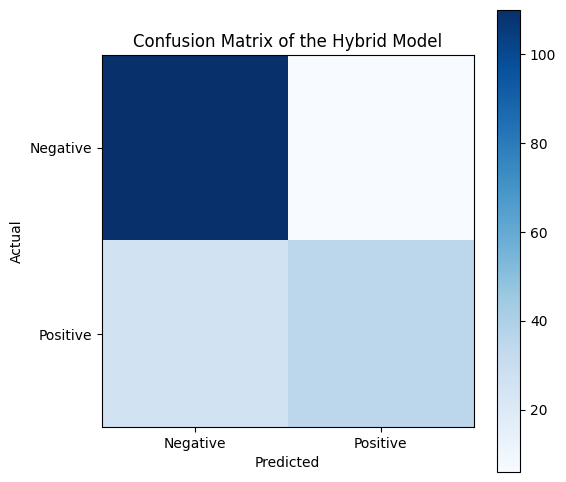

In [168]:
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Hyperparameter Tuning
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [1, 3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid.fit(X_selected, y)

svm_model = SVC()
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
svm_grid = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid.fit(X_selected, y)

# Combine the models into a VotingClassifier
models = [('knn', knn_grid.best_estimator_), ('svm', svm_grid.best_estimator_), ('lr', lr_model), ('lda', lda_model), ('nb', nb_model), ('mlp', mlp_model), ('rf', rf_model)]
voting_model = VotingClassifier(estimators=models)

# Fit the scaler and the ensemble model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
voting_model.fit(X_scaled, y)

# Predict the target variable using the fitted hybrid model
X_test_selected = selector.transform(X_test)
X_test_scaled = scaler.transform(X_test_selected)
y_pred = voting_model.predict(X_test_scaled)

# Print the performance metrics of the hybrid model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Hybrid model accuracy:", accuracy)
print("Hybrid model precision:", precision)
print("Hybrid model recall:", recall)
print("Hybrid model F1 score:", f1)
print("Hybrid model AUC-ROC score:", auc_roc)
print("Hybrid model confusion matrix:")
print(conf_matrix)

# Plot the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
scores = [accuracy, precision, recall, f1, auc_roc]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.title("Performance Metrics of the Hybrid Model")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix of the Hybrid Model")
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the ensemble model and scaler to pickle files
with open('model.pkl', 'wb') as f:
    pickle.dump(voting_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [169]:
feature_names = X.columns.tolist()
print(feature_names)

['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']


In [170]:
X.head()


,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction
0,148,33.6,50,6,0.627
1,85,26.6,31,1,0.351
2,183,23.3,32,8,0.672
3,89,28.1,21,1,0.167
5,116,25.6,30,5,0.201
